In [1]:
from kafka.client import KafkaClient
from kafka.consumer import SimpleConsumer

import pandas as pd
import threading, logging, time

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
avg_temps = {}
max_temps = []

In [3]:
def parse(s):
    split = s.split(",")
    return (split[0], float(split[1]))

def update_avg_temps(temp):
    avg_temps[temp[0]] = temp[1]
    
def update_max_temps(temp):
    max_temps.append(temp)

class Consumer(threading.Thread):
    daemon = True
    
    def __init__(self, topic, handler):
        threading.Thread.__init__(self)
        self.topic = topic
        self.handler = handler

    def run(self):
        client = KafkaClient("localhost:9092")
        consumer = SimpleConsumer(client, "python", self.topic)
        
        for m in consumer:
            #(city, temp)
            temp = parse(m.message.value)
            self.handler(temp)

avg_temp_consumer = Consumer("output_avg", update_avg_temps)
max_temp_consumer = Consumer("output_max", update_max_temps)

In [ ]:
max_temp_consumer.start()
avg_temp_consumer.start()

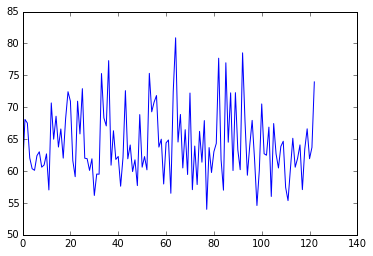

In [16]:
plt.plot([x[1] for x in max_temps])

In [13]:
pd.DataFrame({"Avg_temp": avg_temps})

,Avg_temp
Amsterdam,19.590334
Andorra-la-vella,21.480398
Athens,20.190591
Baku,20.438654
Belfast,20.588814
Belgrade,20.638501
Berlin,19.296830
Berne,19.514307
Bratislava,20.514888
Brussels,19.424165
